In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
'{:0b}'.format(98)

'1100010'

In [3]:
def generar_dominio(k: int):
    a_binario = ('{:0' + str(k) + 'b}').format
    for n in range(2**k):
        yield tuple(map(int, a_binario(n)))

In [4]:
list(generar_dominio(3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [5]:
def generar_dominio(k: int):
    #Suponemos k>=1
    tabla = [[0],
             [1]]
    for n in range(k - 1):
        unos = copy.deepcopy(tabla)
        for renglon in tabla:
            renglon.append(0)
        for renglon in unos:
            renglon.append(1)
        tabla += unos
    return [tuple(reversed(renglon)) for renglon in tabla]

In [6]:
generar_dominio(3)

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [7]:
def generar_transicion(n: int):
    """
    Genera la función de transición del autómata n-ésimo.
    """
    #Convertir a binario
    digitos = []
    while n > 0:
        n, r = divmod(n, 2)
        digitos.append(r)
        
    #Rellenar con 0 hasta alcanzar 8 digitos
    if len(digitos) < 8:
        digitos += [0]*(8-len(digitos))
    
    #Emparejar el número con el dominio
    return dict(zip(generar_dominio(3),digitos))

In [8]:
def un_paso(dic: dict, lista : list):
    
    est = []
    dic1 = dic.items()
    for i in range(len(lista)):
        for regla, estado in dic1:
            if regla == tuple(lista[i:i+3]):
                est.append(estado)
    for regla, estado in dic1:
        if regla == tuple((lista[-1],lista[0],lista[1])):
            est.insert(0, estado)
        if regla == tuple((lista[-2],lista[-1],lista[0])):
            est.append(estado)
            
    return est

In [9]:
regla_50 = generar_transicion(50)
configuracion = [0, 0, 0, 0, 1, 0, 0, 0, 0]
un_paso(regla_50, configuracion)

[0, 0, 0, 1, 0, 1, 0, 0, 0]

In [10]:
regla_50 = generar_transicion(30)
configuracion = [0]*400 + [1] + [0]*400
historia = []
for _ in range(400):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

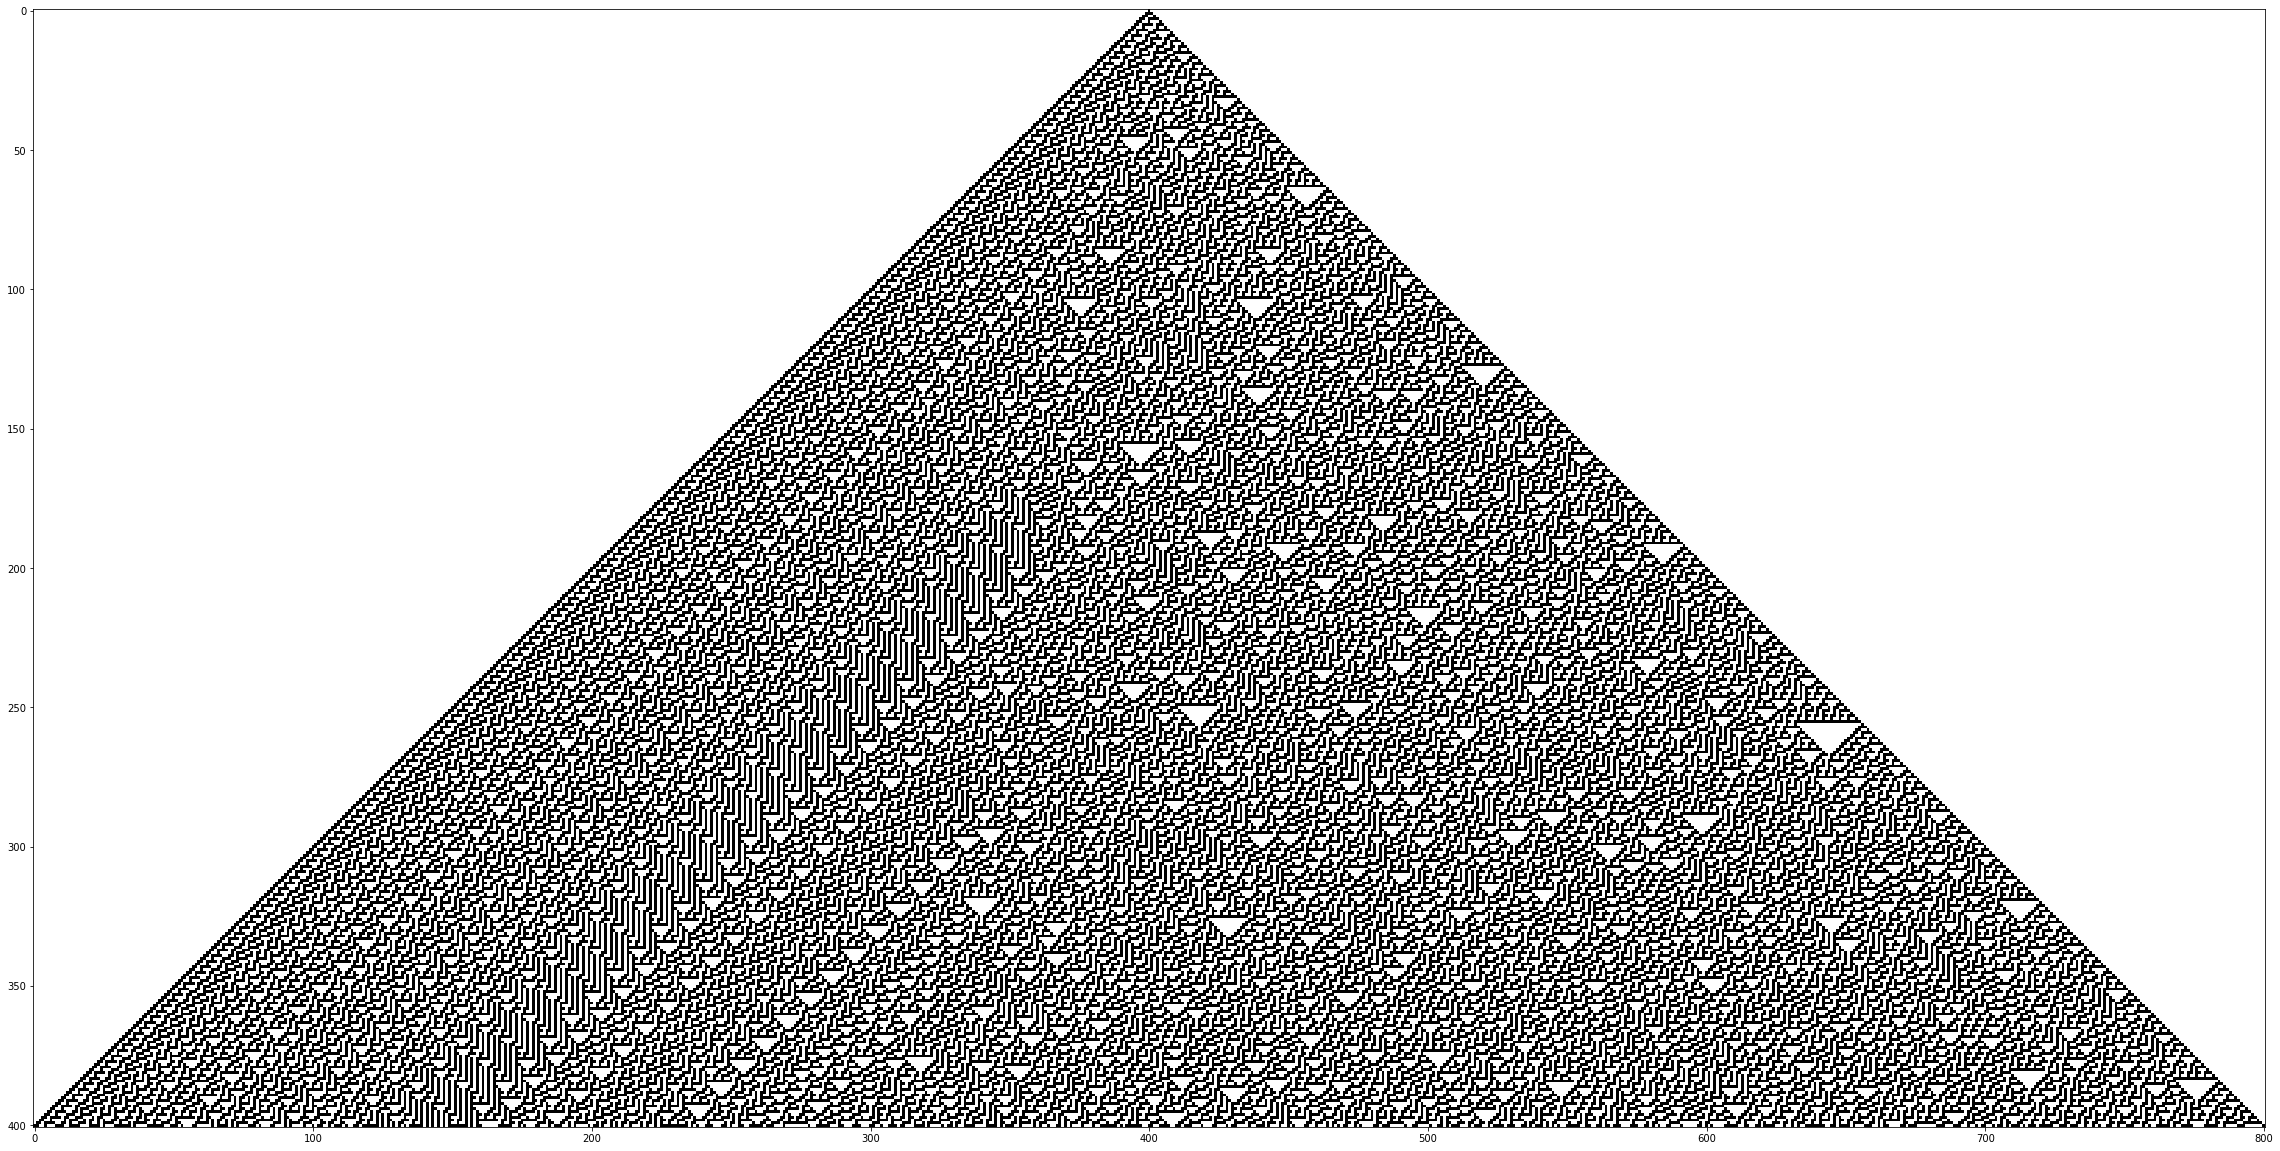

In [11]:
fig, ax = plt.subplots(figsize=(40, 40))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')

In [12]:
class Automata:
    
    def _init_(self, rule, configuracion, n, m=None):
        self.paso = un_paso(rule,configuracion)
        self.n = n
        self.array = 
        regla_50 = generar_transicion(110)
        configuracion = [0]*400 + [1] + [0]*400
        historia = []
        for _ in range(400):
            historia.append(configuracion.copy())
            configuracion = un_paso(regla_50, configuracion)
        historia.append(configuracion.copy())
    
    def generar_dominio(k: int):
        #Suponemos k>=1
        tabla = [[0],
                 [1]]
        for n in range(k - 1):
            unos = copy.deepcopy(tabla)
            for renglon in tabla:
                renglon.append(0)
            for renglon in unos:
                renglon.append(1)
            tabla += unos
        return [tuple(reversed(renglon)) for renglon in tabla]
    
    def generar_transicion(n: int):
        """
        Genera la función de transición del autómata n-ésimo.
        """
        #Convertir a binario
        digitos = []
        while n > 0:
            n, r = divmod(n, 2)
            digitos.append(r)

        #Rellenar con 0 hasta alcanzar 8 digitos
        if len(digitos) < 8:
            digitos += [0]*(8-len(digitos))

        #Emparejar el número con el dominio
        return dict(zip(generar_dominio(3),digitos))
    
    def un_paso(dic: dict, lista : list):
    
        est = []
        dic1 = dic.items()

        for i in range(len(lista)):
            for regla, estado in dic1:
                if regla == tuple(lista[i:i+3]):
                    est.append(estado)

        for regla, estado in dic1:
            if regla == tuple((lista[-1],lista[0],lista[1])):
                est.insert(0, estado)
            if regla == tuple((lista[-2],lista[-1],lista[0])):
                est.append(estado)

        return est

SyntaxError: invalid syntax (<ipython-input-12-744c05250ba5>, line 6)

In [ ]:
class Cell1D:
    """Represents a 1-D a cellular automaton"""

    def __init__(self, rule, n, m=None):
        """Initializes the CA.

        rule: integer
        n: number of rows
        m: number of columns

        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m

        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.random(self.m).round()
        self.next += 1

    def start_string(self, s):
        """Start with values from a string of 1s and 0s."""
        # TODO: Check string length
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1

    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.imshow.

        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.array[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.7)
        
        # turn off axis tick marks
        plt.xticks([])
        plt.yticks([])

In [24]:
regla_50 = generar_transicion(18)
configuracion = [0]*400 + [1] + [0]*400
historia = []
for _ in range(400):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

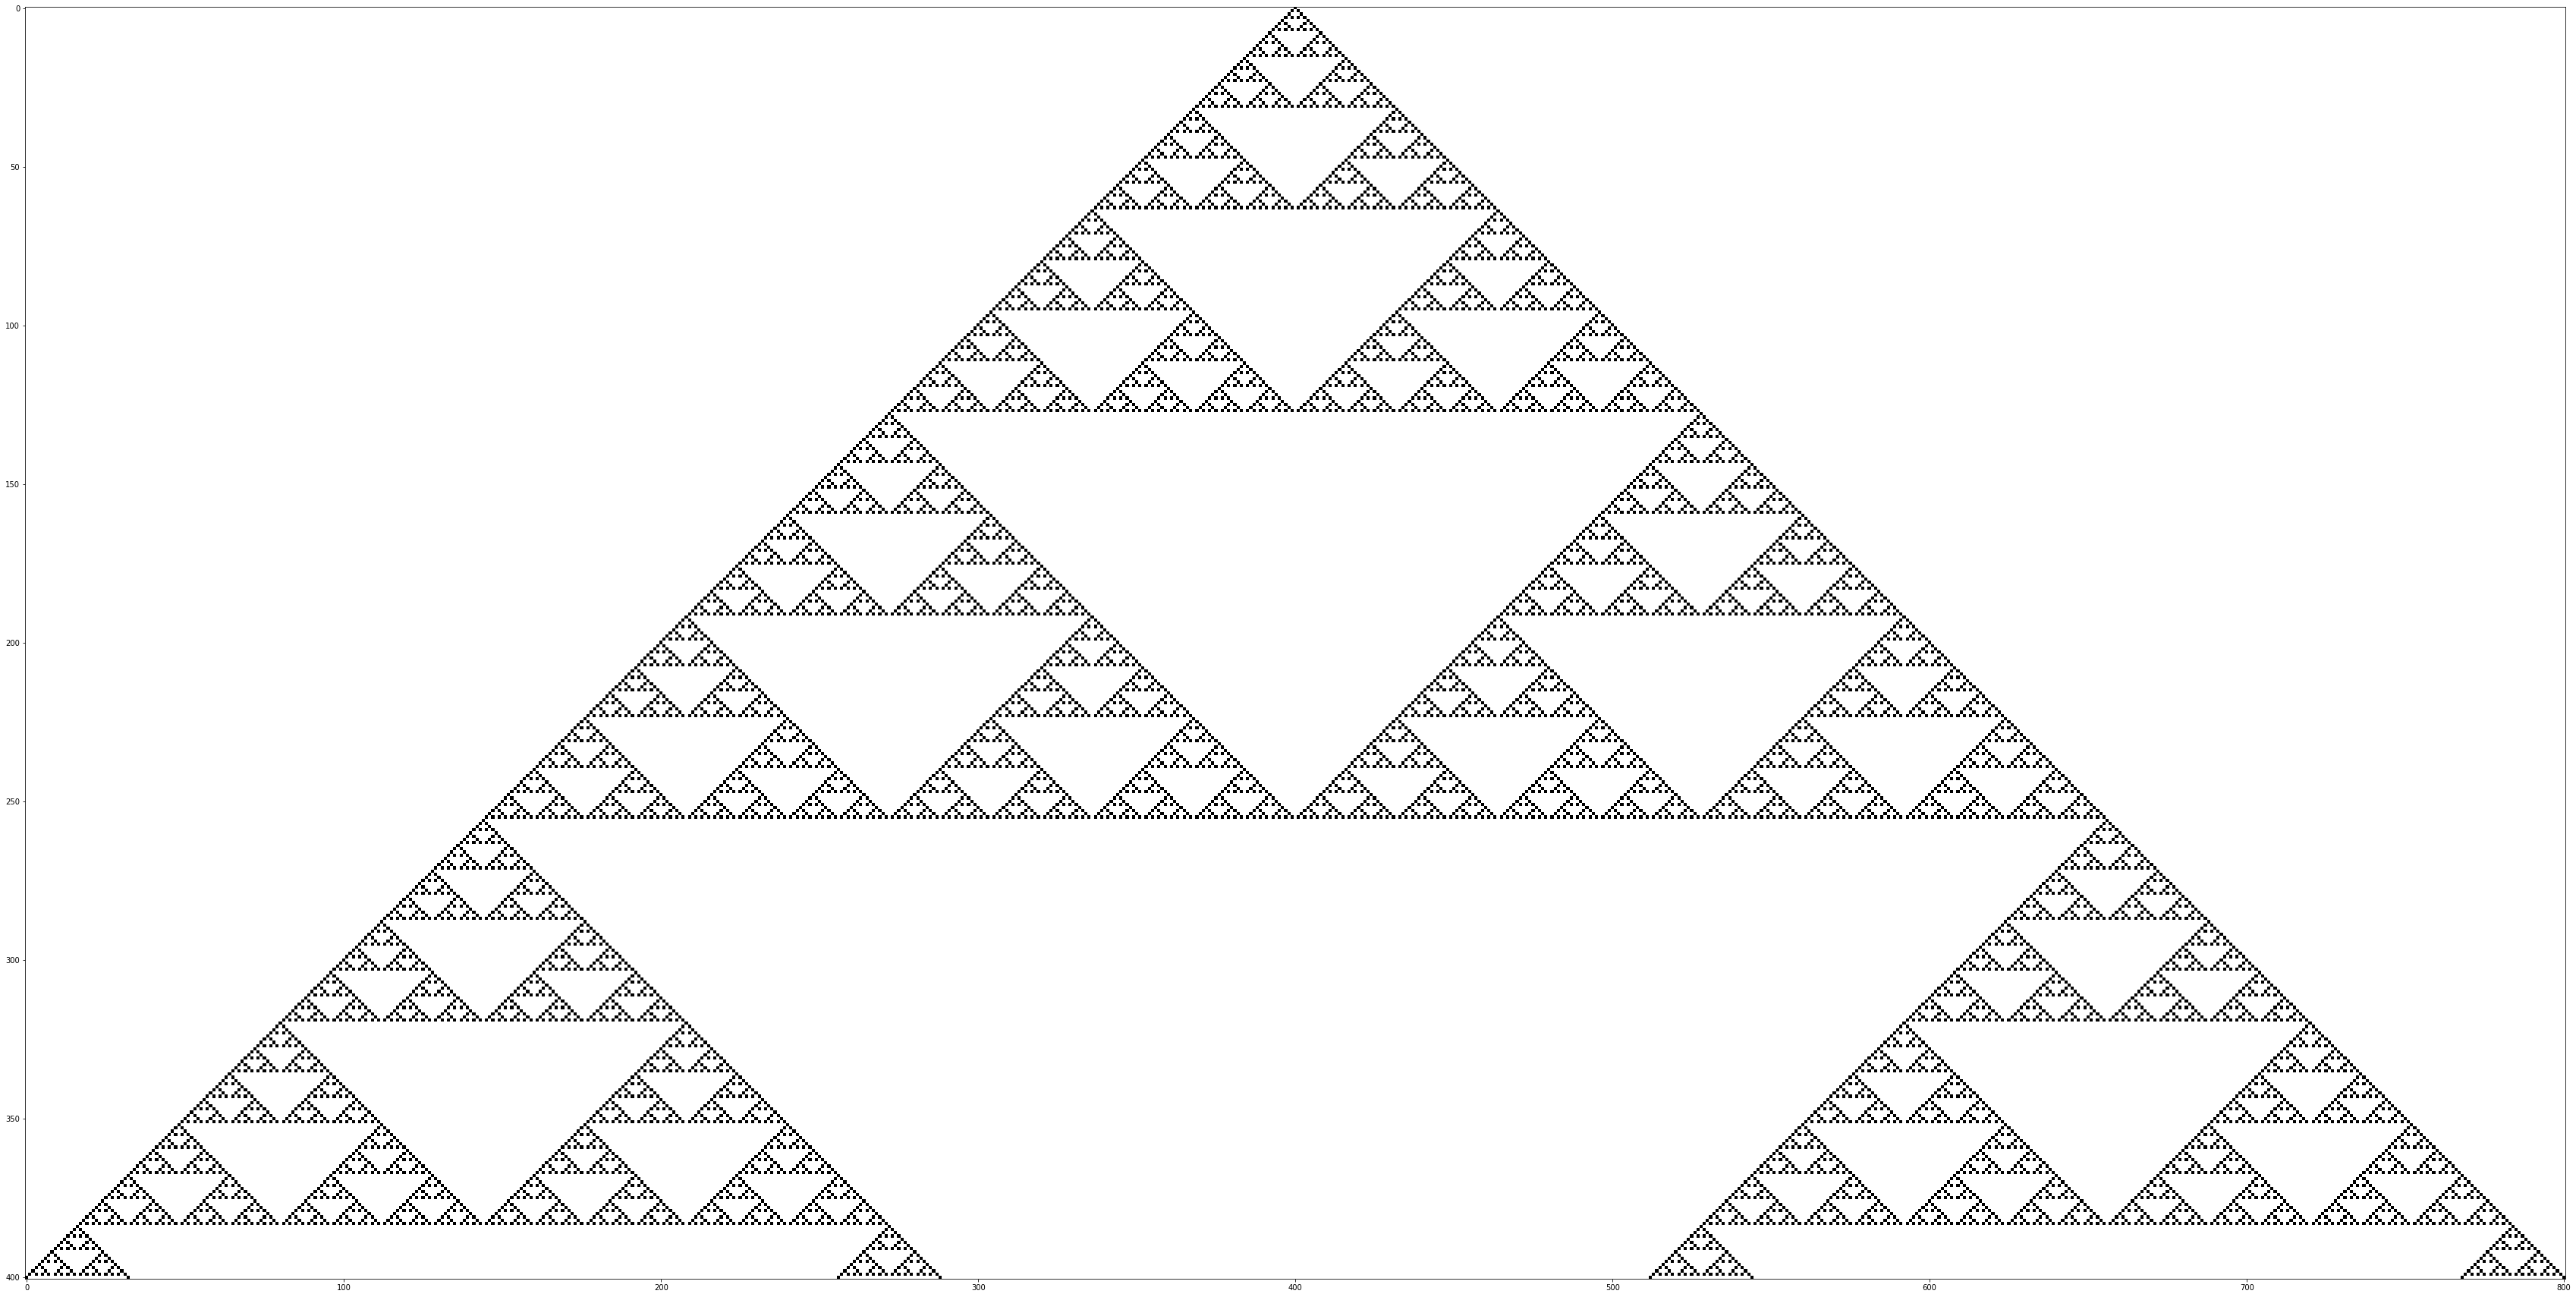

In [25]:
fig, ax = plt.subplots(figsize=(60, 60))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')

In [20]:
regla_50 = generar_transicion(30)
configuracion = [0]*400 + [1] + [0]*400
historia = []
for _ in range(400):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

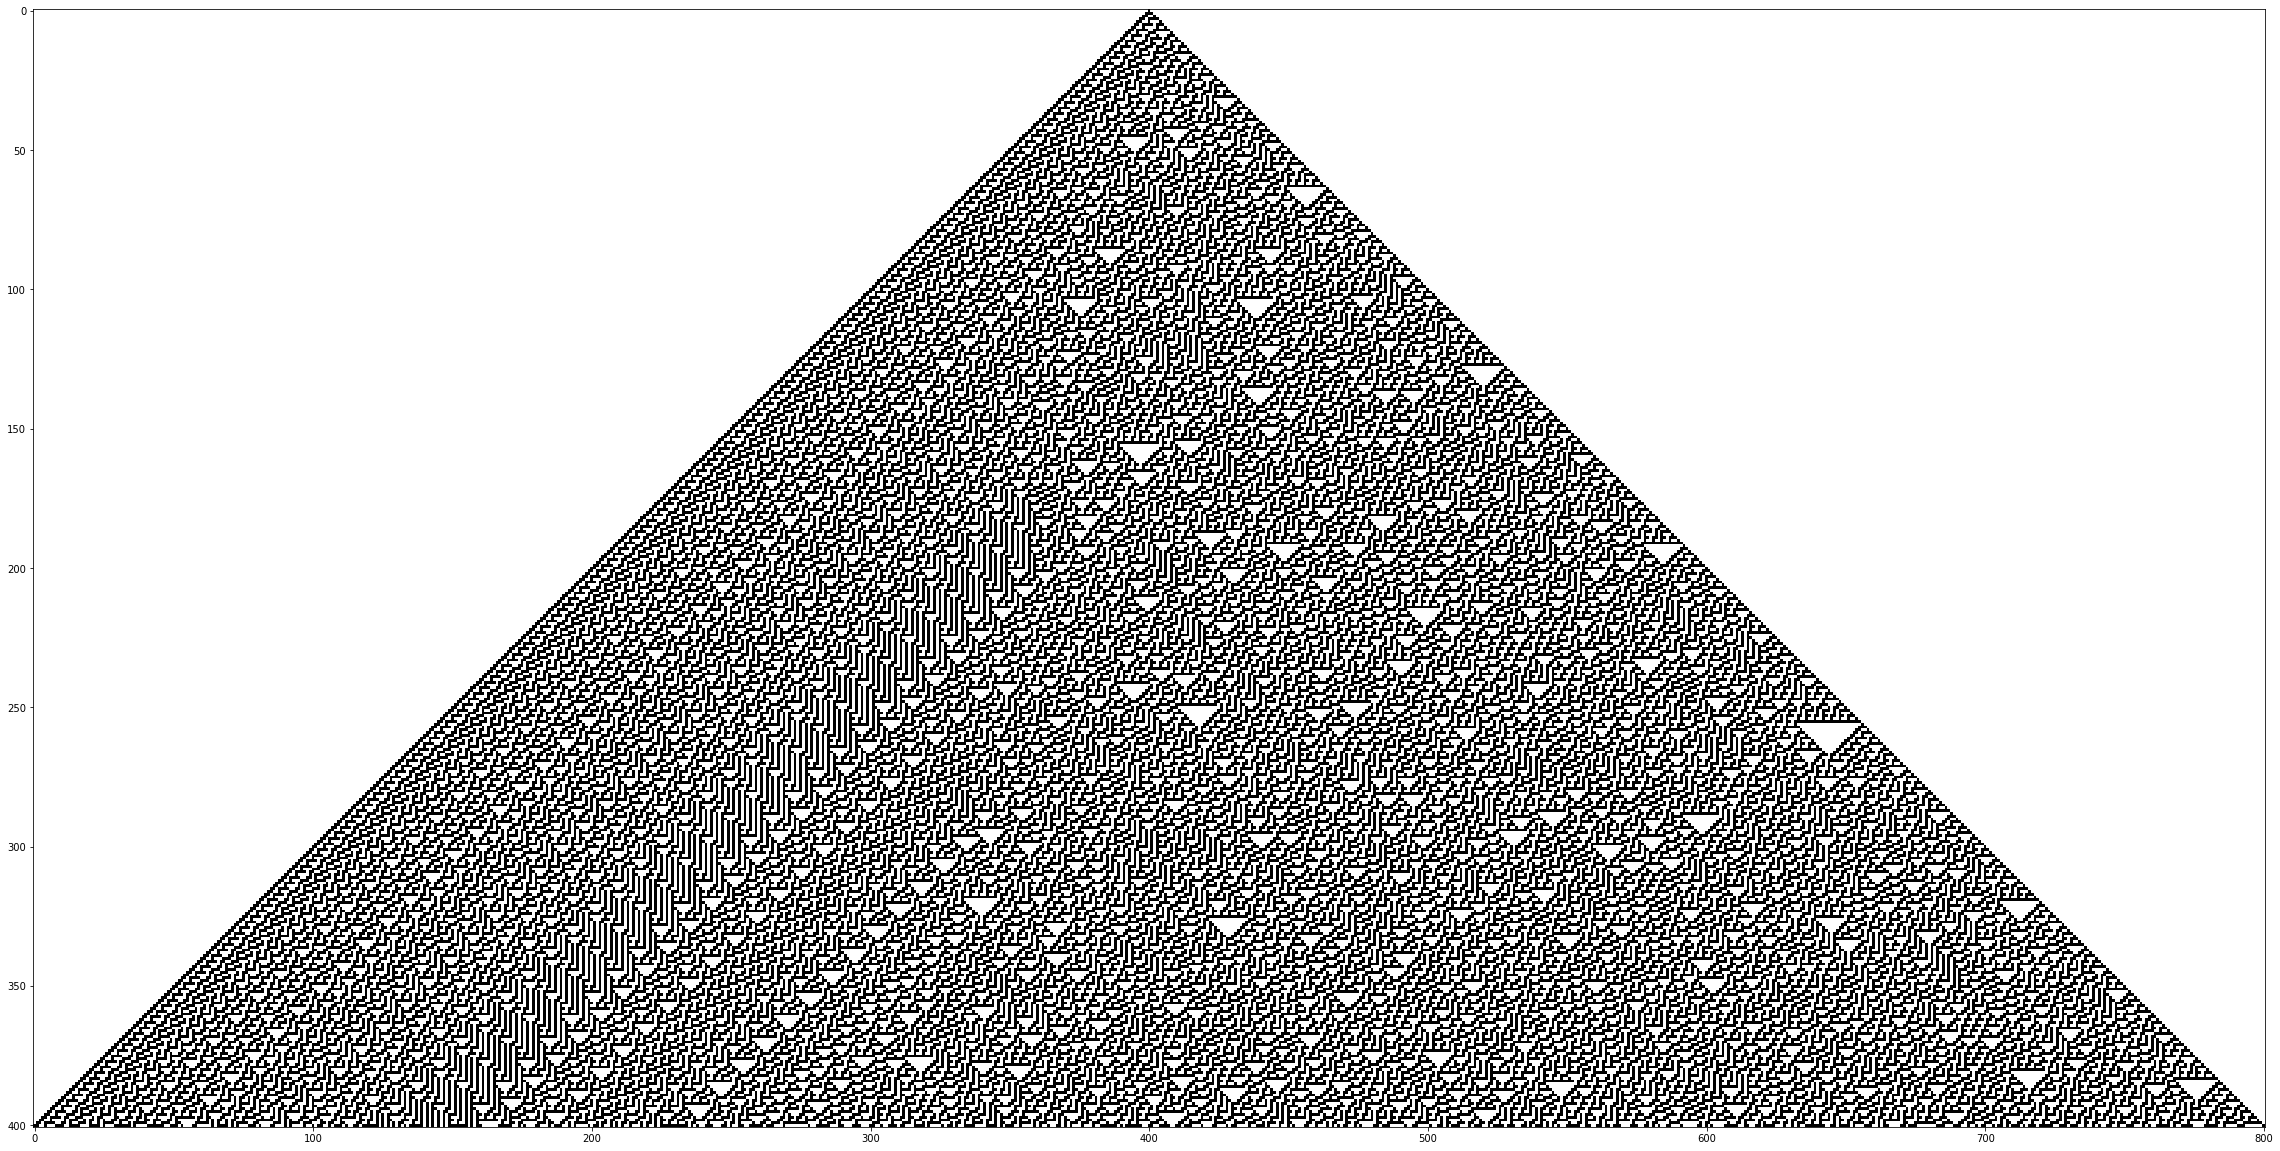

In [21]:
fig, ax = plt.subplots(figsize=(40, 40))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')

In [14]:
regla_50 = generar_transicion(1)
configuracion = [0]*200 + [1] + [0]*200
historia = []
for _ in range(50):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

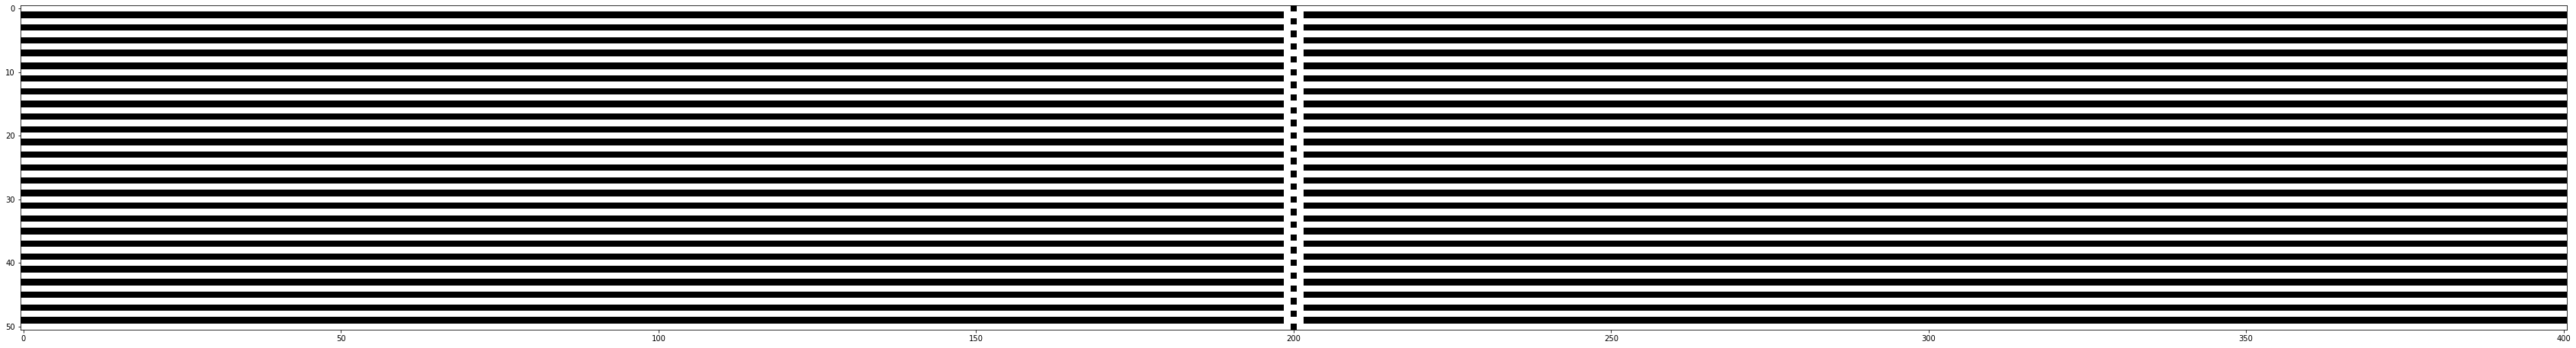

In [15]:
fig, ax = plt.subplots(figsize=(60, 60))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')

In [16]:
regla_50 = generar_transicion(0)
configuracion = [0]*200 + [1] + [0]*200
historia = []
for _ in range(50):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

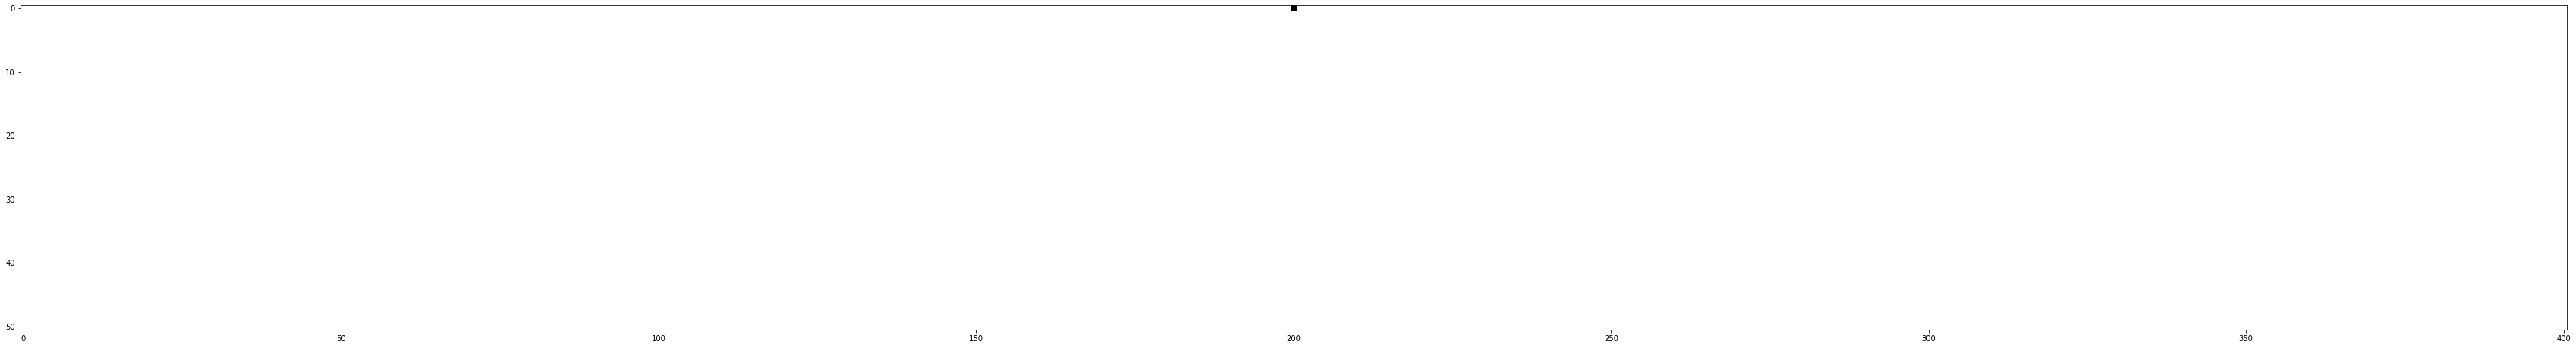

In [17]:
fig, ax = plt.subplots(figsize=(60, 60))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')

In [18]:
regla_50 = generar_transicion(20)
configuracion = [0]*400 + [1] + [0]*400
historia = []
for _ in range(400):
    historia.append(configuracion.copy())
    configuracion = un_paso(regla_50, configuracion)
historia.append(configuracion.copy())

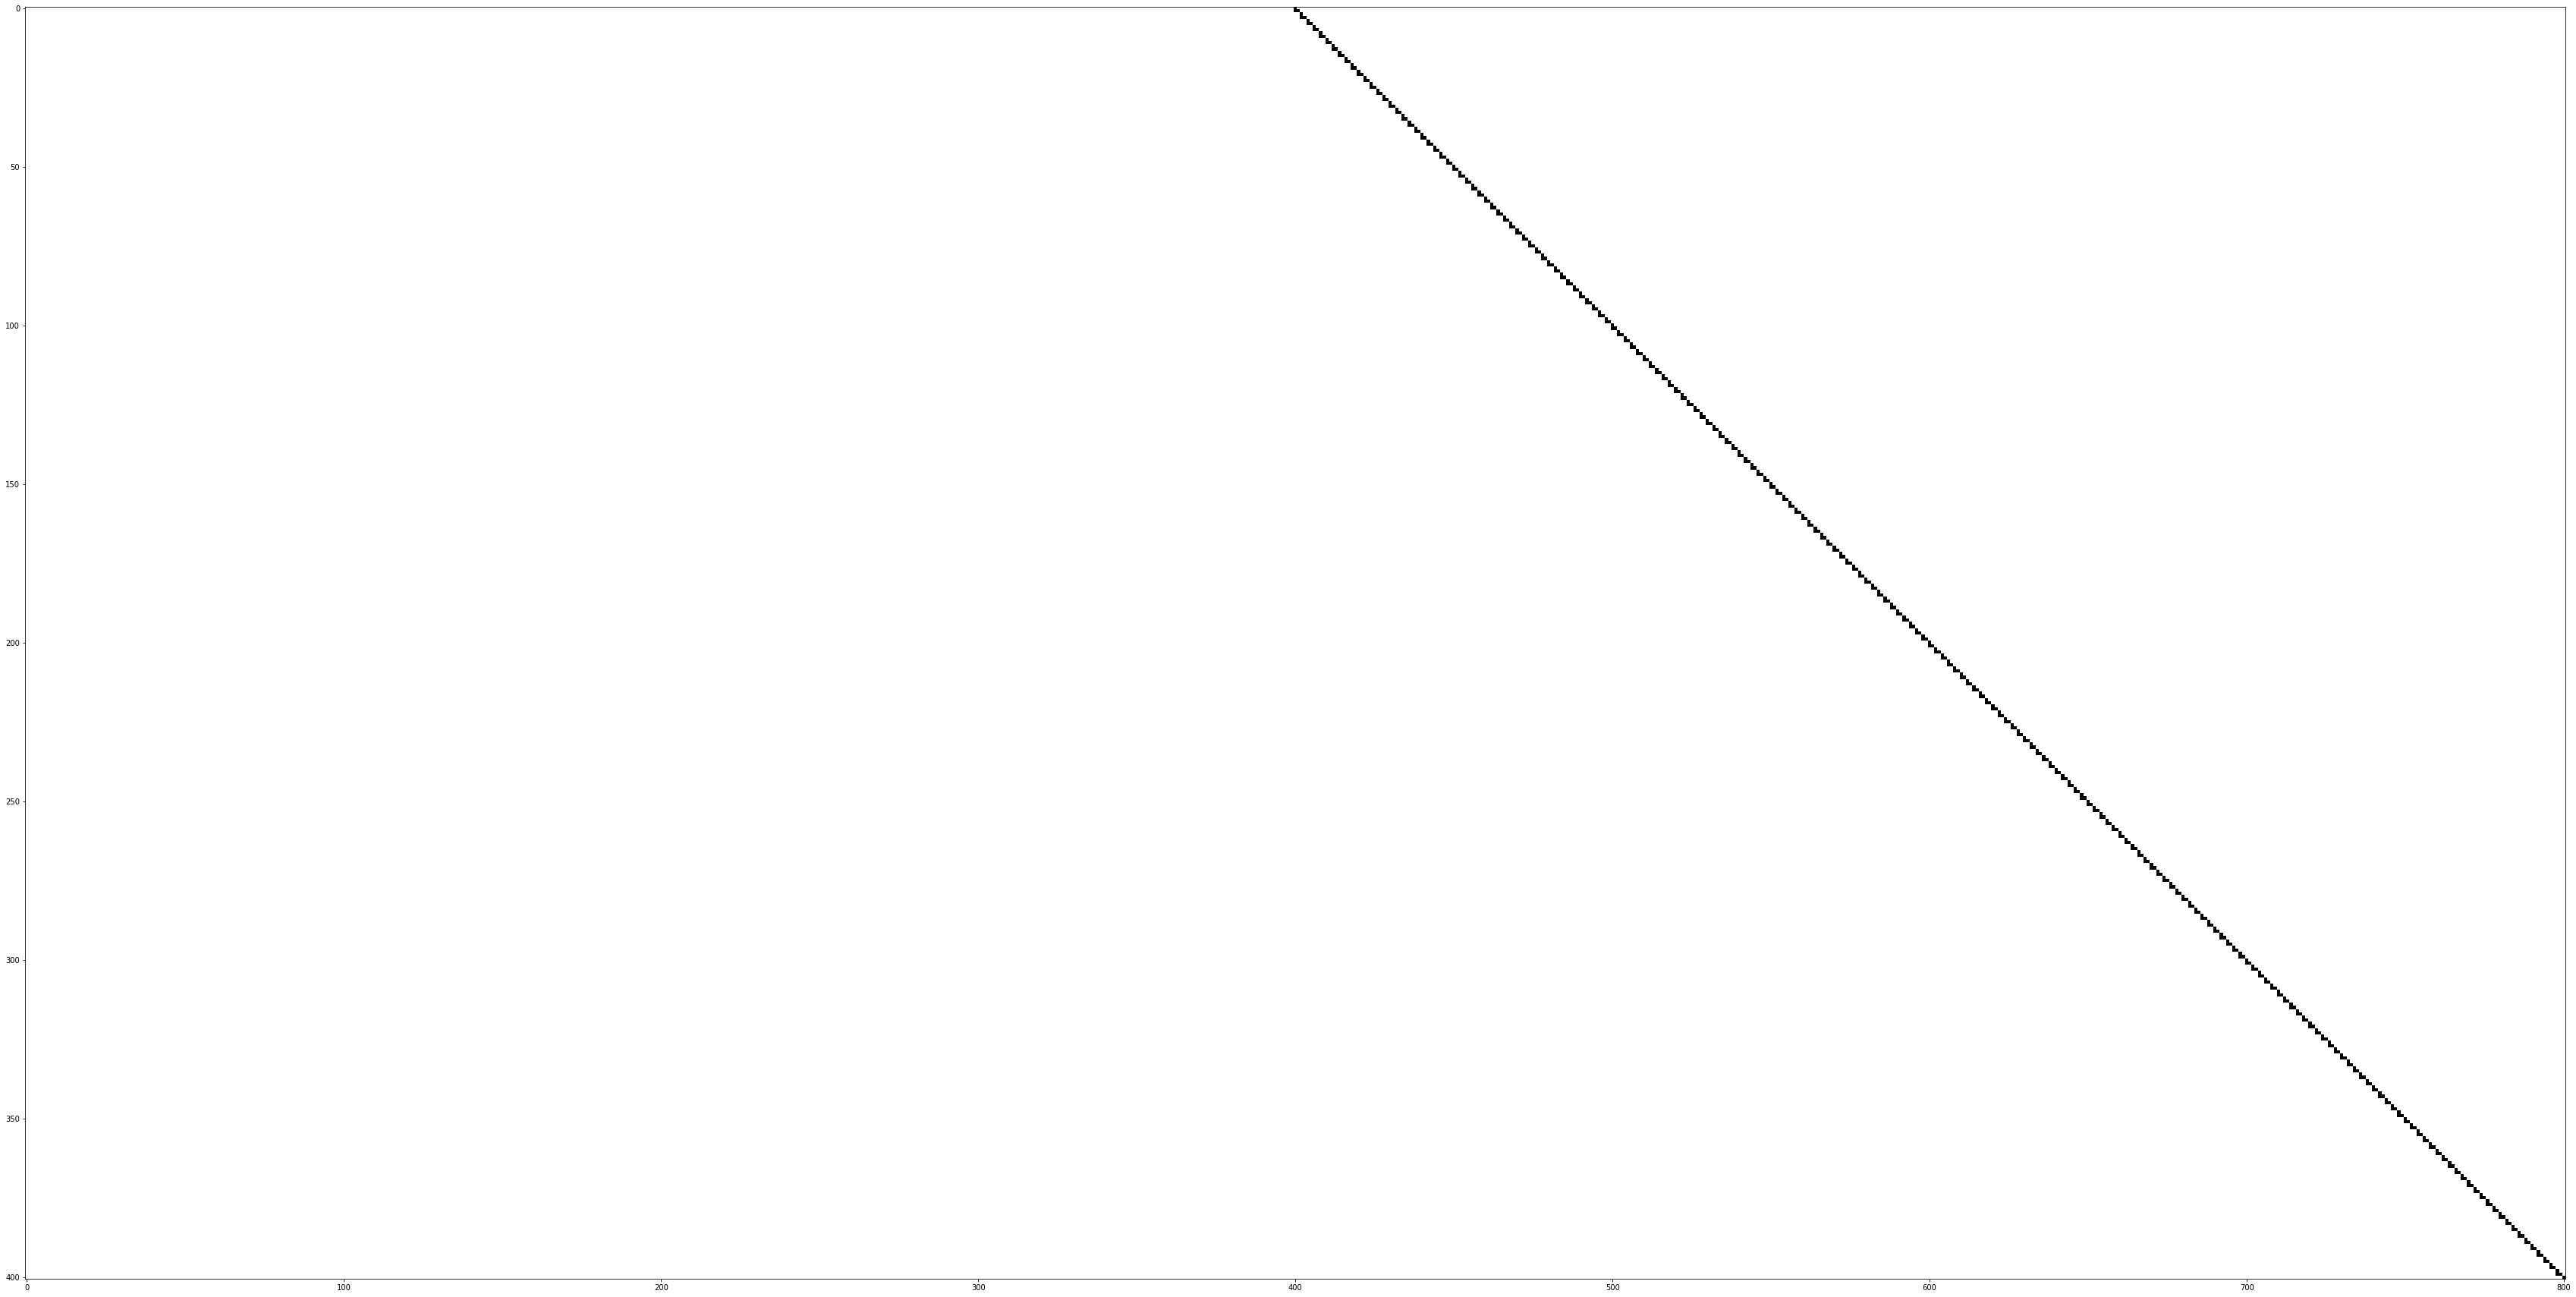

In [19]:
fig, ax = plt.subplots(figsize=(60, 60))
ax.imshow(np.array(historia, dtype=np.int8),cmap='binary')